In [1]:
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import Aer, execute, QuantumCircuit, IBMQ
from qiskit.visualization import plot_histogram

In [2]:
def qft_rotate_single(circuit, i):
    circuit.h(i)
    for qubit in reversed(range(0, i)):
        circuit.cp(pi/2**(i-qubit), qubit, i)

def qft(circuit, i):
    for i in reversed(range(n)):
        qft_rotate_single(circuit, i)
    for i in range(math.floor(n/2)):
        circuit.swap(i, n-(i+1))

回路準備

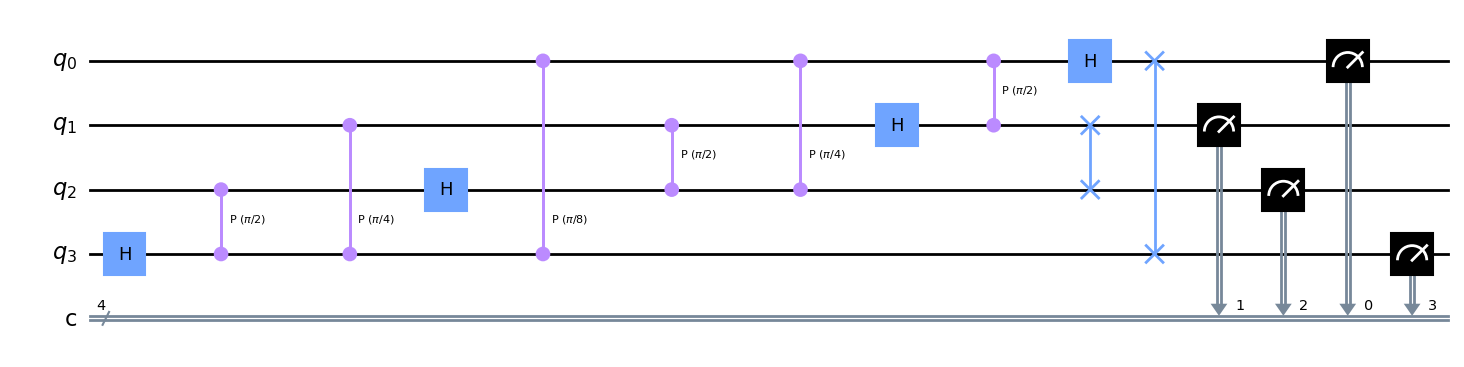

In [7]:
n = 4
qc = QuantumCircuit(n, n)

qft(qc, n)

for i in range(n):
    qc.measure(i, i)

qc.draw('mpl')

{'1001': 571, '1010': 497, '1101': 495, '0111': 514, '0101': 472, '1110': 502, '0011': 508, '0010': 538, '1000': 481, '0100': 551, '0000': 516, '0110': 518, '1011': 513, '1111': 503, '0001': 500, '1100': 513}


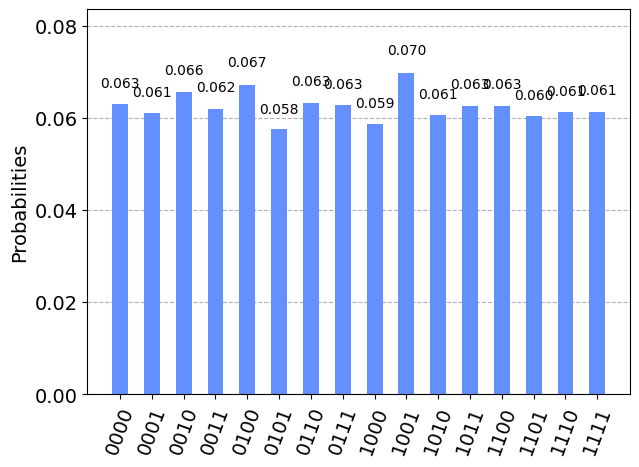

In [6]:
backend = Aer.get_backend('qasm_simulator')
shots = 8192
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

print(answer)
plot_histogram(answer)